In [77]:
import pandas as pd

data = pd.read_csv('data.csv')

In [78]:
data

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [79]:
print(data.head())

    Timestamp  Open  High   Low  Close  Volume_(BTC)  Volume_(Currency)  \
0  1325317920  4.39  4.39  4.39   4.39      0.455581                2.0   
1  1325317980   NaN   NaN   NaN    NaN           NaN                NaN   
2  1325318040   NaN   NaN   NaN    NaN           NaN                NaN   
3  1325318100   NaN   NaN   NaN    NaN           NaN                NaN   
4  1325318160   NaN   NaN   NaN    NaN           NaN                NaN   

   Weighted_Price  
0            4.39  
1             NaN  
2             NaN  
3             NaN  
4             NaN  


In [80]:
print('Dataset Shape:', data.shape)
print('Data Types:', data.dtypes)
print('Summary Statistics:')
print(data.describe())

Dataset Shape: (4857377, 8)
Data Types: Timestamp              int64
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtype: object
Summary Statistics:


          Timestamp          Open          High           Low         Close  \
count  4.857377e+06  3.613769e+06  3.613769e+06  3.613769e+06  3.613769e+06   
mean   1.471301e+09  6.009024e+03  6.013357e+03  6.004488e+03  6.009014e+03   
std    8.428019e+07  8.996247e+03  9.003521e+03  8.988778e+03  8.996360e+03   
min    1.325318e+09  3.800000e+00  3.800000e+00  1.500000e+00  1.500000e+00   
25%    1.398179e+09  4.438600e+02  4.440000e+02  4.435200e+02  4.438600e+02   
50%    1.471428e+09  3.596970e+03  3.598190e+03  3.595620e+03  3.597000e+03   
75%    1.544288e+09  8.627270e+03  8.632980e+03  8.621090e+03  8.627160e+03   
max    1.617149e+09  6.176356e+04  6.178183e+04  6.167355e+04  6.178180e+04   

       Volume_(BTC)  Volume_(Currency)  Weighted_Price  
count  3.613769e+06       3.613769e+06    3.613769e+06  
mean   9.323249e+00       4.176284e+04    6.008935e+03  
std    3.054989e+01       1.518248e+05    8.995992e+03  
min    0.000000e+00       0.000000e+00    3.800000e+00  
25%

## Data Preprocessing

In [81]:
df=data

In [82]:
# Convert Unix time to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')

# Resample to daily frequency
df_daily = df.resample('D', on='Timestamp').mean()

# Resample to monthly frequency
df_monthly = df.resample('M', on='Timestamp').mean()

# Resample to annual frequency
df_annual = df.resample('A-DEC', on='Timestamp').mean()

# Resample to quarterly frequency
df_quarterly = df.resample('Q-DEC', on='Timestamp').mean()

/tmp/ipykernel_8147/4251280080.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M', on='Timestamp').mean()
/tmp/ipykernel_8147/4251280080.py:11: FutureWarning: 'A-DEC' is deprecated and will be removed in a future version, please use 'YE-DEC' instead.
  df_annual = df.resample('A-DEC', on='Timestamp').mean()
/tmp/ipykernel_8147/4251280080.py:14: FutureWarning: 'Q-DEC' is deprecated and will be removed in a future version, please use 'QE-DEC' instead.
  df_quarterly = df.resample('Q-DEC', on='Timestamp').mean()


In [83]:
df_daily = df_daily.fillna(df_daily.mean())
df_monthly = df_monthly.fillna(df_monthly.mean())
df_annual = df_annual.fillna(df_annual.mean())
df_quarterly = df_quarterly.fillna(df_quarterly.mean())


## Feature Engineering

In [84]:
df_daily['Price_Pct_Change'] = df_daily['Close'].pct_change()
df_monthly['Moving_Average_3M'] = df_monthly['Close'].rolling(window=3).mean()
df_monthly['Moving_Average_6M'] = df_monthly['Close'].rolling(window=6).mean()
df_annual['Moving_Average_12M'] = df_annual['Close'].rolling(window=12).mean()
df_quarterly['Rolling_Std_3M'] = df_quarterly['Close'].rolling(window=3).std()
df_quarterly['Rolling_Std_6M'] = df_quarterly['Close'].rolling(window=6).std()


## Exploratory Data Analysis

In [85]:
import matplotlib.pyplot as plt
import numpy as np
# Convert Unix time to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')

# Set the Timestamp column as the index
df.set_index('Timestamp', inplace=True)

# Plot 1: Line chart of Bitcoin closing prices over time
plt.figure(figsize=(10, 5))
plt.plot(df.index.to_numpy(), df['Close'].to_numpy())
plt.title('Bitcoin  Prices over Time')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

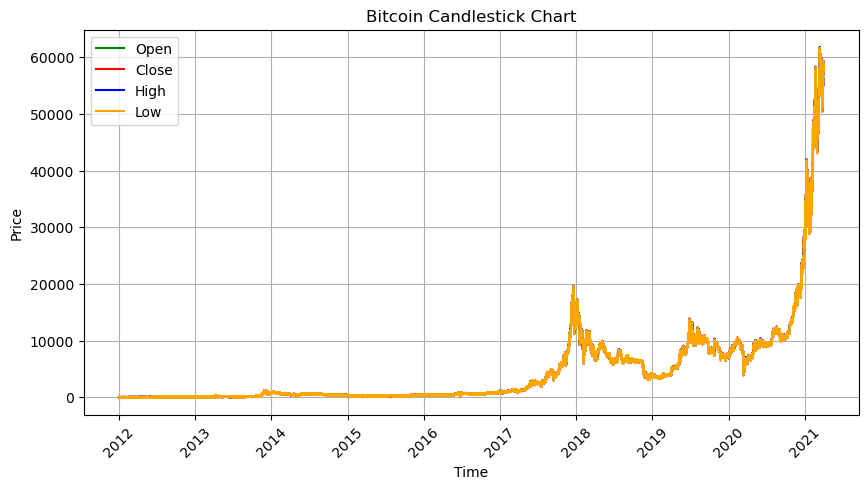

In [ ]:
# Plot 2: Candlestick chart of Bitcoin prices
plt.figure(figsize=(10, 5))
plt.plot(df.index.to_numpy(), df['Open'].to_numpy(), color='green', label='Open')
plt.plot(df.index.to_numpy(), df['Close'].to_numpy(), color='red', label='Close')
plt.plot(df.index.to_numpy(), df['High'].to_numpy(), color='blue', label='High')
plt.plot(df.index.to_numpy(), df['Low'].to_numpy(), color='orange', label='Low')
plt.title('Bitcoin Candlestick Chart')
plt.xlabel('Time')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

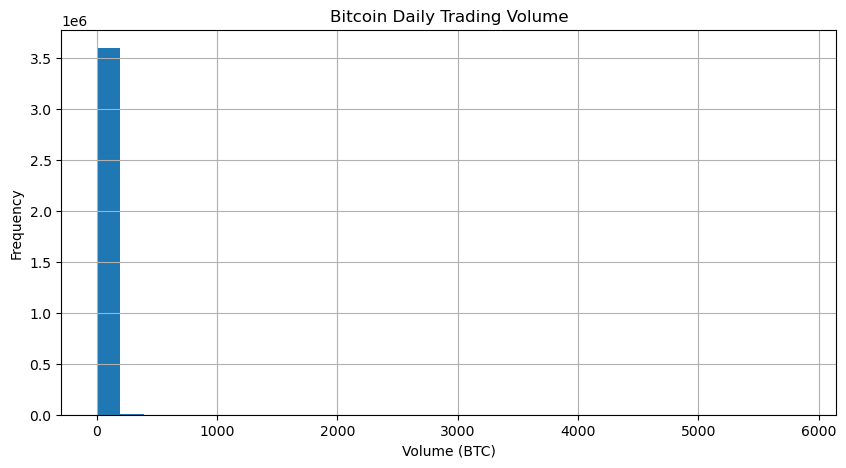

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(df['Volume_(BTC)'], bins=30)
plt.title('Bitcoin Daily Trading Volume')
plt.xlabel('Volume (BTC)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

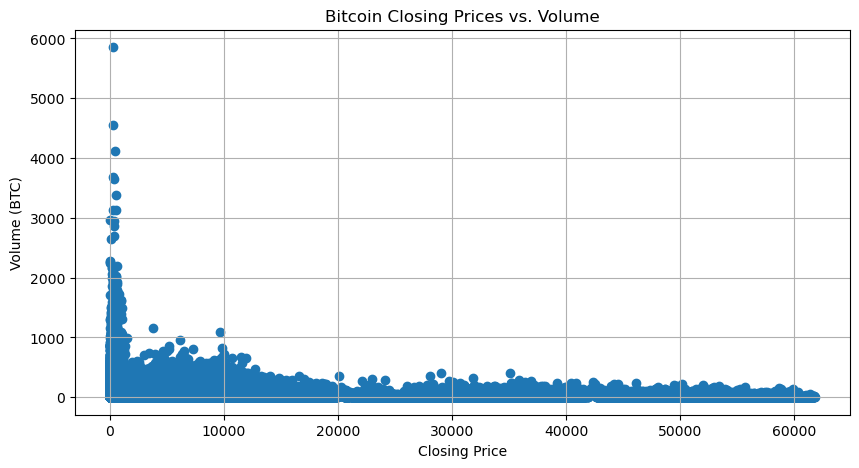

In [ ]:
# Plot 4: Scatter plot of Bitcoin closing prices and volume
plt.figure(figsize=(10, 5))
plt.scatter(df['Close'], df['Volume_(BTC)'])
plt.title('Bitcoin Closing Prices vs. Volume')
plt.xlabel('Closing Price')
plt.ylabel('Volume (BTC)')
plt.grid(True)
plt.show()

<Figure size 1000x500 with 0 Axes>

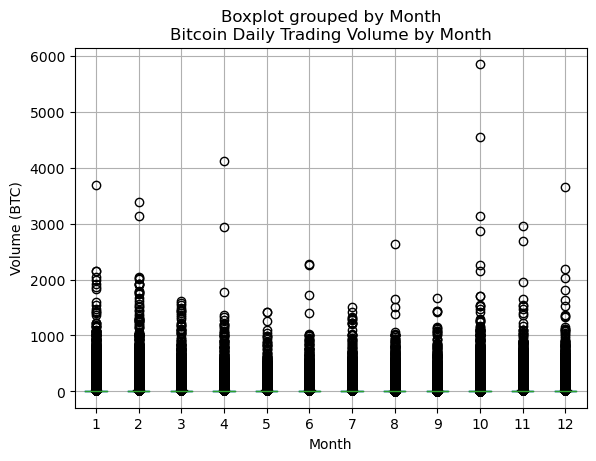

In [ ]:
# Plot 5: Box plot of Bitcoin daily trading volume by month
df['Month'] = df.index.month
plt.figure(figsize=(10, 5))
df.boxplot(column='Volume_(BTC)', by='Month')
plt.title('Bitcoin Daily Trading Volume by Month')
plt.xlabel('Month')
plt.ylabel('Volume (BTC)')
plt.grid(True)
plt.show()

## Model Selection

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

2024-05-06 23:34:00.413452: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-06 23:34:03.534181: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
train_size = int(len(df_daily) * 0.8)
train_data, test_data = df_daily[:train_size], df_daily[train_size:]

In [ ]:
scaler = MinMaxScaler()
scaled_train_data = scaler.fit_transform(train_data[['Close']])
scaled_test_data = scaler.transform(test_data[['Close']])

In [ ]:
scaled_train_data

array([[7.86163155e-06],
       [2.47576242e-05],
       [3.48344116e-05],
       ...,
       [4.01290226e-01],
       [4.15901595e-01],
       [4.19103600e-01]])

### Arima Model

In [ ]:
# ARIMA model
arima_model = ARIMA(train_data['Close'], order=(1, 1, 1))
arima_model_fit = arima_model.fit()
arima_predictions = arima_model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

### SARIMA model


In [ ]:
sarima_model = SARIMAX(train_data['Close'], order=(1, 1, 1), seasonal_order=(0, 1, 1, 12))
sarima_model_fit = sarima_model.fit()
sarima_predictions = sarima_model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.85574D+00    |proj g|=  5.56259D-02


 This problem is unconstrained.



At iterate    5    f=  6.82255D+00    |proj g|=  3.41366D-03

At iterate   10    f=  6.73476D+00    |proj g|=  9.10690D-04

At iterate   15    f=  6.73408D+00    |proj g|=  6.21750D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     30      1     0     0   3.495D-06   6.733D+00
  F =   6.7331943150094684     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


### LSTM

In [ ]:
# LSTM model
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(128, input_shape=(1, 1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

lstm_model = create_lstm_model()
lstm_history = lstm_model.fit(np.expand_dims(scaled_train_data, axis=-1),
                              np.expand_dims(scaled_train_data, axis=-1),
                              epochs=10, batch_size=1, verbose=0)
lstm_predictions = lstm_model.predict(np.expand_dims(scaled_test_data, axis=-1))

/home/hamza/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


In [ ]:
lstm_predictions

### Gradient Boosting Rregressor 

In [ ]:
# Gradient Boosting Regressor model
gbr_model = GradientBoostingRegressor()
gbr_model.fit(np.arange(len(train_data)).reshape(-1, 1), train_data['Close'])
gbr_predictions = gbr_model.predict(np.arange(len(train_data), len(train_data) + len(test_data)).reshape(-1, 1))

### Delta Rule LSTM

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense

def create_lstm_model():
    model = Sequential()
    model.add(LSTM(128, input_shape=(1, 1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model


def predict_lstm_model(model, test_data):
    predictions = model.predict(np.expand_dims(test_data, axis=-1))
    return predictions

def delta_rule(target, predicted, learning_rate=0.01):
    error = target - predicted
    delta = learning_rate * error * predicted
    return delta

def train_lstm_with_delta_rule(model, train_data, epochs=10, learning_rate=0.01):
    for epoch in range(epochs):
        for i in range(len(train_data) - 1):
            X = np.array(train_data[i]).reshape(1, 1, 1)
            y_true = np.array(train_data[i + 1]).reshape(1, 1, 1)
            y_pred = model.predict(X)
            delta = delta_rule(y_true, y_pred, learning_rate)
            model.train_on_batch(X, y_true - delta)



lstm_predictions = predict_lstm_model(lstm_model, scaled_test_data)

# Train LSTM model using Delta Rule
train_lstm_with_delta_rule(lstm_model, scaled_train_data)

# Make predictions using LSTM model trained with Delta Rule
delta_rule_predictions = predict_lstm_model(lstm_model, scaled_test_data)


/home/hamza/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type ellipsis).

### Evaluation

In [ ]:
# Calculate RMSE for each model
arima_rmse = np.sqrt(mean_squared_error(test_data['Close'], arima_predictions))
sarima_rmse = np.sqrt(mean_squared_error(test_data['Close'], sarima_predictions))
lstm_rmse = np.sqrt(mean_squared_error(test_data['Close'], lstm_predictions))
gbr_rmse = np.sqrt(mean_squared_error(test_data['Close'], gbr_predictions))

# Print the RMSE values
print(f"ARIMA RMSE: {arima_rmse}")
print(f"SARIMA RMSE: {sarima_rmse}")
print(f"LSTM RMSE: {lstm_rmse}")
print(f"Gradient Boosting Regressor RMSE: {gbr_rmse}")

ARIMA RMSE: 14490.546813875131
SARIMA RMSE: 13692.218178058887
LSTM RMSE: 19658.407024786957
Gradient Boosting Regressor RMSE: 14573.196791659071


### RMSE Comparison

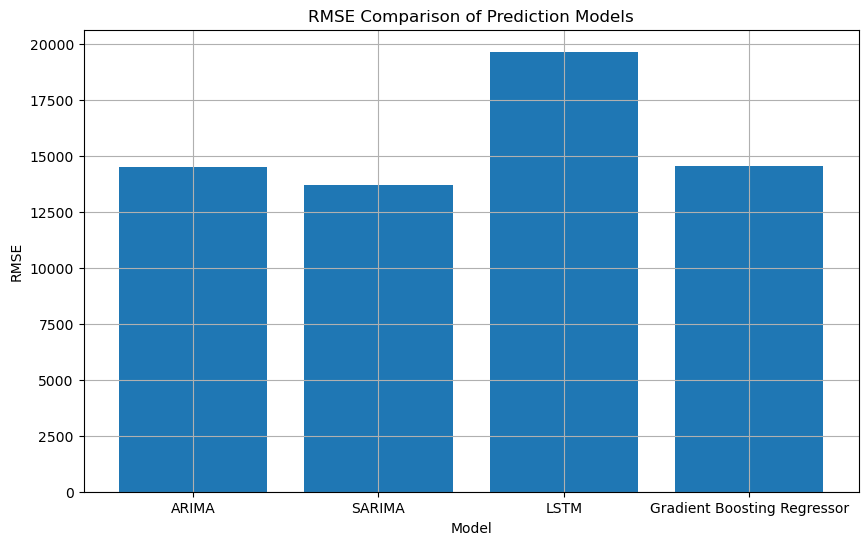

In [ ]:
# Define the models and RMSE values
models = ['ARIMA', 'SARIMA', 'LSTM', 'Gradient Boosting Regressor']
rmse_values = [arima_rmse, sarima_rmse, lstm_rmse, gbr_rmse]

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(models, rmse_values)
plt.title('RMSE Comparison of Prediction Models')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()


In [ ]:
test_data["Close"]

Timestamp
2019-05-26     8126.474769
2019-05-27     8782.527847
2019-05-28     8726.058610
2019-05-29     8646.492764
2019-05-30     8631.688479
                  ...     
2021-03-27    55195.415367
2021-03-28    55835.012863
2021-03-29    56915.629993
2021-03-30    58349.357087
2021-03-31    58778.180000
Freq: D, Name: Close, Length: 676, dtype: float64

In [ ]:
sarima_predictions

2019-05-26     8061.721709
2019-05-27     8059.308056
2019-05-28     8063.480247
2019-05-29     8054.886186
2019-05-30     8047.770162
                  ...     
2021-03-27    10054.865749
2021-03-28    10064.923355
2021-03-29    10068.648839
2021-03-30    10066.938569
2021-03-31    10063.981024
Freq: D, Name: predicted_mean, Length: 676, dtype: float64

In [ ]:
scaled_train_data

[Ellipsis]